
# Data preprocessing/augmentation

##    Data cleaning
      Fetch one-min stock data for trading hours only - 09:30 EST to 16:00 EST
      Handle missing samples

##    Data augment
       Build DateTime column as dataframe index
       Calculate one-min returns
       Calculate cum returns for the interested period
       Calculate daily RSI for the interested period
       Concatenate sector etf stock price and returns (needed for RNN time-series forecasting)
       Concatenate S&P500 etf stock price and returns (needed for RNN time-series forecasting)

In [186]:
import tensorflow as tf
import numpy as np
import os

In [187]:
import pandas as pd
import glob

# read daily stock data for single stock under consideration (MSFT)
stockPath ='C:/cygwin64/home/mpatnam/CSCIE63/CSCI E-89 Deep Learning/Project/stocks'
stockFiles = glob.glob(stockPath + "/allstocks_2014*/table_msft.csv")

stockdata = pd.concat([pd.read_csv(f, header=None , names=['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume', 
                                                  'SplitFactor', 'Earnings', 'Dividends']) for f in stockFiles], axis=0)

print('Total rows x columns:', stockdata.shape)
stockdata

Total rows x columns: (114842, 10)


,Date,Time,Open,High,Low,Close,Volume,SplitFactor,Earnings,Dividends
0,20140102,700,33.6842,33.6842,33.6842,33.6842,2.217100e+00,1,0,0.0
1,20140102,705,33.6300,33.6300,33.6300,33.6300,3.769010e+01,1,0,0.0
2,20140102,721,33.6300,33.6300,33.6300,33.6300,1.108530e+02,1,0,0.0
3,20140102,727,33.6481,33.6481,33.6481,33.6481,8.092290e+01,1,0,0.0
4,20140102,758,33.7383,33.7383,33.6932,33.6932,5.542660e+02,1,0,0.0
5,20140102,800,33.6932,33.6932,33.6932,33.6932,4.888630e+02,1,0,0.0
6,20140102,801,33.6932,33.6932,33.6932,33.6932,1.108530e+02,1,0,0.0
7,20140102,821,33.6481,33.6661,33.6481,33.6481,3.325600e+02,1,0,0.0
8,20140102,826,33.7473,33.7473,33.6481,33.6481,1.821320e+03,1,0,0.0
9,20140102,829,33.6481,33.6481,33.6481,33.6481,4.755600e+02,1,0,0.0


In [188]:
#
# Read daily stock data for single etf under consideration (XLK)
# Note the single stock chosen (MSFT) is one of the biggest holdings of this ETF.
#
etfPath = 'C:/cygwin64/home/mpatnam/CSCIE63/CSCI E-89 Deep Learning/Project/etfs'
etfFiles = glob.glob(etfPath + "/allstocks_2014*/table_xlk.csv")

etfdata = pd.concat([pd.read_csv(f, header=None , names=['etf.Date', 'etf.Time', 'etf.Open', 'etf.High', 'etf.Low', 'etf.Close', 'etf.Volume', 
                                                  'etf.SplitFactor', 'etf.Earnings', 'etf.Dividends']) for f in etfFiles], axis=0)

print('Total rows x columns:', etfdata.shape)
etfdata

Total rows x columns: (99969, 10)


,etf.Date,etf.Time,etf.Open,etf.High,etf.Low,etf.Close,etf.Volume,etf.SplitFactor,etf.Earnings,etf.Dividends
0,20140102,800,33.4127,33.4127,33.4127,33.4127,234.3850,1,0,0.0
1,20140102,841,33.3940,33.3940,33.3940,33.3940,57.7937,1,0,0.0
2,20140102,913,33.3846,33.3846,33.3846,33.3846,149.8350,1,0,0.0
3,20140102,930,33.2818,33.2818,33.1884,33.2164,182545.0000,1,0,0.0
4,20140102,931,33.2164,33.2164,33.1978,33.2024,23803.5000,1,0,0.0
5,20140102,932,33.2071,33.2258,33.2024,33.2071,21283.1000,1,0,0.0
6,20140102,933,33.2164,33.2351,33.2071,33.2118,40543.3000,1,0,0.0
7,20140102,934,33.2118,33.2118,33.1884,33.1891,21332.3000,1,0,0.0
8,20140102,935,33.1978,33.2071,33.1791,33.1884,17642.1000,1,0,0.0
9,20140102,936,33.1881,33.1978,33.1791,33.1791,16770.9000,1,0,0.0


In [189]:
#
# Read daily stock data for the etf that represents the entire S&P500 index (SPX)
# Note the single stock chosen (MSFT) is one of the biggest holdings of this ETF.
#
spyPath = 'C:/cygwin64/home/mpatnam/CSCIE63/CSCI E-89 Deep Learning/Project/etfs'
spyFiles = glob.glob(etfPath + "/allstocks_2014*/table_spy.csv")

spydata = pd.concat([pd.read_csv(f, header=None , names=['spy.Date', 'spy.Time', 'spy.Open', 'spy.High', 'spy.Low', 'spy.Close', 'spy.Volume', 
                                                  'spy.SplitFactor', 'spy.Earnings', 'spy.Dividends']) for f in spyFiles], axis=0)

print('Total rows x columns:', spydata.shape)
spydata

Total rows x columns: (171924, 10)


,spy.Date,spy.Time,spy.Open,spy.High,spy.Low,spy.Close,spy.Volume,spy.SplitFactor,spy.Earnings,spy.Dividends
0,20140102,700,170.728,170.747,170.700,170.700,53056.4000,1,0,0.0
1,20140102,701,170.663,170.700,170.663,170.672,8090.0200,1,0,0.0
2,20140102,702,170.672,170.700,170.672,170.700,4313.5300,1,0,0.0
3,20140102,703,170.672,170.672,170.672,170.672,2019.8100,1,0,0.0
4,20140102,704,170.672,170.691,170.672,170.672,29844.2000,1,0,0.0
5,20140102,705,170.682,170.682,170.682,170.682,1132.3000,1,0,0.0
6,20140102,706,170.700,170.700,170.700,170.700,30787.8000,1,0,0.0
7,20140102,707,170.700,170.700,170.700,170.700,3019.4700,1,0,0.0
8,20140102,708,170.682,170.682,170.654,170.654,8303.5400,1,0,0.0
9,20140102,710,170.654,170.654,170.635,170.635,3774.3400,1,0,0.0


In [195]:
# Calculate daily return
stockdata['stock.Return'] = (stockdata['Close']-stockdata['Open'])*100/stockdata['Open']
stockdata

,Date,Time,Open,High,Low,Close,Volume,SplitFactor,Earnings,Dividends,stock.Return
0,20140102,700,33.6842,33.6842,33.6842,33.6842,2.217100e+00,1,0,0.0,0.000000
1,20140102,705,33.6300,33.6300,33.6300,33.6300,3.769010e+01,1,0,0.0,0.000000
2,20140102,721,33.6300,33.6300,33.6300,33.6300,1.108530e+02,1,0,0.0,0.000000
3,20140102,727,33.6481,33.6481,33.6481,33.6481,8.092290e+01,1,0,0.0,0.000000
4,20140102,758,33.7383,33.7383,33.6932,33.6932,5.542660e+02,1,0,0.0,-0.133676
5,20140102,800,33.6932,33.6932,33.6932,33.6932,4.888630e+02,1,0,0.0,0.000000
6,20140102,801,33.6932,33.6932,33.6932,33.6932,1.108530e+02,1,0,0.0,0.000000
7,20140102,821,33.6481,33.6661,33.6481,33.6481,3.325600e+02,1,0,0.0,0.000000
8,20140102,826,33.7473,33.7473,33.6481,33.6481,1.821320e+03,1,0,0.0,-0.293949
9,20140102,829,33.6481,33.6481,33.6481,33.6481,4.755600e+02,1,0,0.0,0.000000


In [196]:
# Calculate daily return of etf
etfdata['etf.Return'] = (etfdata['etf.Close']-etfdata['etf.Open'])*100/etfdata['etf.Open']
etfdata

,etf.Date,etf.Time,etf.Open,etf.High,etf.Low,etf.Close,etf.Volume,etf.SplitFactor,etf.Earnings,etf.Dividends,etf.Return
0,20140102,800,33.4127,33.4127,33.4127,33.4127,234.3850,1,0,0.0,0.000000
1,20140102,841,33.3940,33.3940,33.3940,33.3940,57.7937,1,0,0.0,0.000000
2,20140102,913,33.3846,33.3846,33.3846,33.3846,149.8350,1,0,0.0,0.000000
3,20140102,930,33.2818,33.2818,33.1884,33.2164,182545.0000,1,0,0.0,-0.196504
4,20140102,931,33.2164,33.2164,33.1978,33.2024,23803.5000,1,0,0.0,-0.042148
5,20140102,932,33.2071,33.2258,33.2024,33.2071,21283.1000,1,0,0.0,0.000000
6,20140102,933,33.2164,33.2351,33.2071,33.2118,40543.3000,1,0,0.0,-0.013849
7,20140102,934,33.2118,33.2118,33.1884,33.1891,21332.3000,1,0,0.0,-0.068349
8,20140102,935,33.1978,33.2071,33.1791,33.1884,17642.1000,1,0,0.0,-0.028315
9,20140102,936,33.1881,33.1978,33.1791,33.1791,16770.9000,1,0,0.0,-0.027118


In [197]:
# Calculate one-min/cumulative returns of spy
spydata['spy.Return'] = (spydata['spy.Close']-spydata['spy.Open'])*100/spydata['spy.Open']
spydata

,spy.Date,spy.Time,spy.Open,spy.High,spy.Low,spy.Close,spy.Volume,spy.SplitFactor,spy.Earnings,spy.Dividends,spy.Return
0,20140102,700,170.728,170.747,170.700,170.700,53056.4000,1,0,0.0,-0.016400
1,20140102,701,170.663,170.700,170.663,170.672,8090.0200,1,0,0.0,0.005274
2,20140102,702,170.672,170.700,170.672,170.700,4313.5300,1,0,0.0,0.016406
3,20140102,703,170.672,170.672,170.672,170.672,2019.8100,1,0,0.0,0.000000
4,20140102,704,170.672,170.691,170.672,170.672,29844.2000,1,0,0.0,0.000000
5,20140102,705,170.682,170.682,170.682,170.682,1132.3000,1,0,0.0,0.000000
6,20140102,706,170.700,170.700,170.700,170.700,30787.8000,1,0,0.0,0.000000
7,20140102,707,170.700,170.700,170.700,170.700,3019.4700,1,0,0.0,0.000000
8,20140102,708,170.682,170.682,170.654,170.654,8303.5400,1,0,0.0,-0.016405
9,20140102,710,170.654,170.654,170.635,170.635,3774.3400,1,0,0.0,-0.011134


In [198]:
#
# Calculate average-gain and loss for each day using one-min samples
#
arr1=stockdata['Close'][:-1].values
arr2=stockdata['Close'][1:].values
arr_gain=arr2-arr1
arr_loss=arr2-arr1
print(arr_gain.shape)
print(arr_loss.shape)
arr_gain[arr_gain<0]=0
arr_loss[arr_loss>0]=0
arr_loss=abs(arr_loss)
arr_gain=np.insert(arr_gain,0, 0)
arr_loss=np.insert(arr_loss,0, 0)

# Add intermediate Gain/Loss columns - used later for RSI
stockdata['Gain']=arr_gain
stockdata['Loss']=arr_loss
stockdata['RSI']=0.0
stockdata

(114841,)
(114841,)


,Date,Time,Open,High,Low,Close,Volume,SplitFactor,Earnings,Dividends,stock.Return,Gain,Loss,RSI
0,20140102,700,33.6842,33.6842,33.6842,33.6842,2.217100e+00,1,0,0.0,0.000000,0.0000,0.0000,0.0
1,20140102,705,33.6300,33.6300,33.6300,33.6300,3.769010e+01,1,0,0.0,0.000000,0.0000,0.0542,0.0
2,20140102,721,33.6300,33.6300,33.6300,33.6300,1.108530e+02,1,0,0.0,0.000000,0.0000,0.0000,0.0
3,20140102,727,33.6481,33.6481,33.6481,33.6481,8.092290e+01,1,0,0.0,0.000000,0.0181,0.0000,0.0
4,20140102,758,33.7383,33.7383,33.6932,33.6932,5.542660e+02,1,0,0.0,-0.133676,0.0451,0.0000,0.0
5,20140102,800,33.6932,33.6932,33.6932,33.6932,4.888630e+02,1,0,0.0,0.000000,0.0000,0.0000,0.0
6,20140102,801,33.6932,33.6932,33.6932,33.6932,1.108530e+02,1,0,0.0,0.000000,0.0000,0.0000,0.0
7,20140102,821,33.6481,33.6661,33.6481,33.6481,3.325600e+02,1,0,0.0,0.000000,0.0000,0.0451,0.0
8,20140102,826,33.7473,33.7473,33.6481,33.6481,1.821320e+03,1,0,0.0,-0.293949,0.0000,0.0000,0.0
9,20140102,829,33.6481,33.6481,33.6481,33.6481,4.755600e+02,1,0,0.0,0.000000,0.0000,0.0000,0.0


In [199]:
#
# calculate RSI:
# RSI = 100 - 100 / (1 + RS)
# where,RS = Average Gain / Average Loss
#
groupby_date = stockdata['Gain'].groupby(stockdata['Date'])
agg_gain=groupby_date.apply(sum)

groupby_date = stockdata['Loss'].groupby(stockdata['Date'])
agg_loss=groupby_date.apply(sum)

for idx, date in enumerate(agg_gain.index.values):
    RSI = 100 - (100 / (1 + (agg_gain.values[idx] / agg_loss.values[idx])))
    print(date, agg_gain.values[idx], agg_loss.values[idx], RSI)
    stockdata.loc[(stockdata['Date'] == date), 'RSI'] = RSI
stockdata

20140102 2.4367000000000303 2.590100000000028 48.474178403755914
20140103 2.5852999999999895 2.7656999999999883 48.3143337693889
20140106 3.076499999999953 3.7710999999999544 44.92815000876212
20140107 3.640800000000006 3.875400000000006 48.43937095872915
20140108 3.0333000000000325 3.1956000000000344 48.69720175311853
20140109 2.800999999999963 2.963399999999961 48.591353826937755
20140110 3.931300000000043 3.5073000000000434 52.84999865566098
20140113 3.667999999999971 4.606199999999969 44.33056972275262
20140114 3.283200000000015 2.6157000000000146 55.65783451151906
20140115 3.16880000000004 2.4020000000000437 56.882314927837875
20140116 3.479500000000023 3.28100000000002 51.4680866799793
20140117 2.687000000000012 3.0749000000000137 46.63392283795276
20140121 2.972300000000054 3.2429000000000485 47.823078903333844
20140122 3.0086000000000226 2.9365000000000236 50.60638172612739
20140123 9.249200000000023 8.211800000000025 52.970620239390634
20140124 7.254899999999978 7.805199999999

,Date,Time,Open,High,Low,Close,Volume,SplitFactor,Earnings,Dividends,stock.Return,Gain,Loss,RSI
0,20140102,700,33.6842,33.6842,33.6842,33.6842,2.217100e+00,1,0,0.0,0.000000,0.0000,0.0000,48.474178
1,20140102,705,33.6300,33.6300,33.6300,33.6300,3.769010e+01,1,0,0.0,0.000000,0.0000,0.0542,48.474178
2,20140102,721,33.6300,33.6300,33.6300,33.6300,1.108530e+02,1,0,0.0,0.000000,0.0000,0.0000,48.474178
3,20140102,727,33.6481,33.6481,33.6481,33.6481,8.092290e+01,1,0,0.0,0.000000,0.0181,0.0000,48.474178
4,20140102,758,33.7383,33.7383,33.6932,33.6932,5.542660e+02,1,0,0.0,-0.133676,0.0451,0.0000,48.474178
5,20140102,800,33.6932,33.6932,33.6932,33.6932,4.888630e+02,1,0,0.0,0.000000,0.0000,0.0000,48.474178
6,20140102,801,33.6932,33.6932,33.6932,33.6932,1.108530e+02,1,0,0.0,0.000000,0.0000,0.0000,48.474178
7,20140102,821,33.6481,33.6661,33.6481,33.6481,3.325600e+02,1,0,0.0,0.000000,0.0000,0.0451,48.474178
8,20140102,826,33.7473,33.7473,33.6481,33.6481,1.821320e+03,1,0,0.0,-0.293949,0.0000,0.0000,48.474178
9,20140102,829,33.6481,33.6481,33.6481,33.6481,4.755600e+02,1,0,0.0,0.000000,0.0000,0.0000,48.474178


In [200]:
stockdata=stockdata[(stockdata['Time']>=930) & (stockdata['Time']<=1600)]
etfdata=etfdata[(etfdata['etf.Time']>=930) & (etfdata['etf.Time']<=1600)]
spydata=spydata[(spydata['spy.Time']>=930) & (spydata['spy.Time']<=1600)]

In [201]:
print(stockdata.shape, etfdata.shape, spydata.shape)

(98061, 14) (97712, 11) (98269, 11)


In [208]:
# Data Wrangling - 
# convert Date/Time columns into native datetime type
# set DateTime as table index column
#
stockdata['DateTimeStr'] = stockdata['Date'].map(str)+' '+stockdata['Time'].map(str)
stockdata['DateTime'] = pd.to_datetime(stockdata['DateTimeStr'], format="%Y%m%d %H%M")
stockdata=stockdata.set_index(pd.DatetimeIndex(stockdata['DateTime']))
stockdata

c:\users\mpatnam\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\mpatnam\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Time,Open,High,Low,Close,Volume,SplitFactor,Earnings,Dividends,stock.Return,Gain,Loss,RSI,DateTimeStr,DateTime
DateTime,,,,,,,,,,,,,,,,
2014-01-02 09:30:00,20140102,930,33.6932,33.7383,33.6661,33.6842,1319510.0,1,0,0.0,-0.026712,0.0000,0.0090,48.474178,20140102 930,2014-01-02 09:30:00
2014-01-02 09:31:00,20140102,931,33.6932,33.7293,33.6661,33.7157,206817.0,1,0,0.0,0.066779,0.0315,0.0000,48.474178,20140102 931,2014-01-02 09:31:00
2014-01-02 09:32:00,20140102,932,33.7112,33.7293,33.6030,33.6120,227216.0,1,0,0.0,-0.294264,0.0000,0.1037,48.474178,20140102 932,2014-01-02 09:32:00
2014-01-02 09:33:00,20140102,933,33.6120,33.6300,33.5759,33.6120,170074.0,1,0,0.0,0.000000,0.0000,0.0000,48.474178,20140102 933,2014-01-02 09:33:00
2014-01-02 09:34:00,20140102,934,33.6120,33.6391,33.6120,33.6300,48095.9,1,0,0.0,0.053552,0.0180,0.0000,48.474178,20140102 934,2014-01-02 09:34:00
2014-01-02 09:35:00,20140102,935,33.6300,33.6481,33.6120,33.6327,61244.2,1,0,0.0,0.008029,0.0027,0.0000,48.474178,20140102 935,2014-01-02 09:35:00
2014-01-02 09:36:00,20140102,936,33.6300,33.6481,33.6210,33.6210,24677.0,1,0,0.0,-0.026762,0.0000,0.0117,48.474178,20140102 936,2014-01-02 09:36:00
2014-01-02 09:37:00,20140102,937,33.6300,33.6526,33.6210,33.6481,120999.0,1,0,0.0,0.053821,0.0271,0.0000,48.474178,20140102 937,2014-01-02 09:37:00
2014-01-02 09:38:00,20140102,938,33.6391,33.6481,33.6120,33.6481,112894.0,1,0,0.0,0.026755,0.0000,0.0000,48.474178,20140102 938,2014-01-02 09:38:00


In [209]:
etfdata['etf.DateTimeStr'] = etfdata['etf.Date'].map(str)+' '+etfdata['etf.Time'].map(str)
etfdata['etf.DateTime'] = pd.to_datetime(etfdata['etf.DateTimeStr'], format="%Y%m%d %H%M")
etfdata=etfdata.set_index(pd.DatetimeIndex(etfdata['etf.DateTime']))
etfdata

c:\users\mpatnam\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
c:\users\mpatnam\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,etf.Date,etf.Time,etf.Open,etf.High,etf.Low,etf.Close,etf.Volume,etf.SplitFactor,etf.Earnings,etf.Dividends,etf.Return,etf.DateTimeStr,etf.DateTime
etf.DateTime,,,,,,,,,,,,,
2014-01-02 09:30:00,20140102,930,33.2818,33.2818,33.1884,33.2164,182545.00,1,0,0.0,-0.196504,20140102 930,2014-01-02 09:30:00
2014-01-02 09:31:00,20140102,931,33.2164,33.2164,33.1978,33.2024,23803.50,1,0,0.0,-0.042148,20140102 931,2014-01-02 09:31:00
2014-01-02 09:32:00,20140102,932,33.2071,33.2258,33.2024,33.2071,21283.10,1,0,0.0,0.000000,20140102 932,2014-01-02 09:32:00
2014-01-02 09:33:00,20140102,933,33.2164,33.2351,33.2071,33.2118,40543.30,1,0,0.0,-0.013849,20140102 933,2014-01-02 09:33:00
2014-01-02 09:34:00,20140102,934,33.2118,33.2118,33.1884,33.1891,21332.30,1,0,0.0,-0.068349,20140102 934,2014-01-02 09:34:00
2014-01-02 09:35:00,20140102,935,33.1978,33.2071,33.1791,33.1884,17642.10,1,0,0.0,-0.028315,20140102 935,2014-01-02 09:35:00
2014-01-02 09:36:00,20140102,936,33.1881,33.1978,33.1791,33.1791,16770.90,1,0,0.0,-0.027118,20140102 936,2014-01-02 09:36:00
2014-01-02 09:37:00,20140102,937,33.1791,33.2071,33.1744,33.1976,38101.00,1,0,0.0,0.055758,20140102 937,2014-01-02 09:37:00
2014-01-02 09:38:00,20140102,938,33.1931,33.1978,33.1697,33.1791,87877.40,1,0,0.0,-0.042177,20140102 938,2014-01-02 09:38:00


In [210]:
spydata['spy.DateTimeStr'] = spydata['spy.Date'].map(str)+' '+spydata['spy.Time'].map(str)
spydata['spy.DateTime'] = pd.to_datetime(spydata['spy.DateTimeStr'], format="%Y%m%d %H%M")
spydata=spydata.set_index(pd.DatetimeIndex(spydata['spy.DateTime']))
spydata

c:\users\mpatnam\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
c:\users\mpatnam\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,spy.Date,spy.Time,spy.Open,spy.High,spy.Low,spy.Close,spy.Volume,spy.SplitFactor,spy.Earnings,spy.Dividends,spy.Return,spy.DateTimeStr,spy.DateTime
spy.DateTime,,,,,,,,,,,,,
2014-01-02 09:30:00,20140102,930,170.607,170.617,170.450,170.524,2060200.0,1,0,0.0,-0.048650,20140102 930,2014-01-02 09:30:00
2014-01-02 09:31:00,20140102,931,170.524,170.570,170.487,170.529,789639.0,1,0,0.0,0.002932,20140102 931,2014-01-02 09:31:00
2014-01-02 09:32:00,20140102,932,170.524,170.635,170.524,170.589,822658.0,1,0,0.0,0.038118,20140102 932,2014-01-02 09:32:00
2014-01-02 09:33:00,20140102,933,170.580,170.691,170.580,170.598,794920.0,1,0,0.0,0.010552,20140102 933,2014-01-02 09:33:00
2014-01-02 09:34:00,20140102,934,170.598,170.607,170.515,170.515,298269.0,1,0,0.0,-0.048652,20140102 934,2014-01-02 09:34:00
2014-01-02 09:35:00,20140102,935,170.524,170.544,170.450,170.459,359799.0,1,0,0.0,-0.038118,20140102 935,2014-01-02 09:35:00
2014-01-02 09:36:00,20140102,936,170.450,170.468,170.311,170.320,759176.0,1,0,0.0,-0.076269,20140102 936,2014-01-02 09:36:00
2014-01-02 09:37:00,20140102,937,170.315,170.403,170.292,170.376,601665.0,1,0,0.0,0.035816,20140102 937,2014-01-02 09:37:00
2014-01-02 09:38:00,20140102,938,170.367,170.376,170.190,170.236,655337.0,1,0,0.0,-0.076893,20140102 938,2014-01-02 09:38:00


In [212]:
# calculate cumulative returns
stockdata['stock.CumReturn'] = (stockdata['Close']-stockdata['Close'][0])*100/stockdata['Close'][0]
etfdata['etf.CumReturn']     = (etfdata['etf.Close']-etfdata['etf.Close'][0])*100/etfdata['etf.Close'][0]
spydata['spy.CumReturn']     = (spydata['spy.Close']-spydata['spy.Close'][0])*100/spydata['spy.Close'][0]

In [216]:
stock_combine_data=pd.concat([stockdata, 
                             etfdata['etf.Open'], etfdata['etf.Close'], etfdata['etf.Return'], etfdata['etf.CumReturn'],
                             spydata['spy.Open'], spydata['spy.Close'], spydata['spy.Return'], spydata['spy.CumReturn']], 
                             axis=1, join='inner')
stock_combine_data.dtypes
stock_combine_data

,Date,Time,Open,High,Low,Close,Volume,SplitFactor,Earnings,Dividends,...,DateTime,stock.CumReturn,etf.Open,etf.Close,etf.Return,etf.CumReturn,spy.Open,spy.Close,spy.Return,spy.CumReturn
2014-01-02 09:30:00,20140102,930,33.6932,33.7383,33.6661,33.6842,1319510.0,1,0,0.0,...,2014-01-02 09:30:00,0.000000,33.2818,33.2164,-0.196504,0.000000,170.607,170.524,-0.048650,0.000000
2014-01-02 09:31:00,20140102,931,33.6932,33.7293,33.6661,33.7157,206817.0,1,0,0.0,...,2014-01-02 09:31:00,0.093516,33.2164,33.2024,-0.042148,-0.042148,170.524,170.529,0.002932,0.002932
2014-01-02 09:32:00,20140102,932,33.7112,33.7293,33.6030,33.6120,227216.0,1,0,0.0,...,2014-01-02 09:32:00,-0.214344,33.2071,33.2071,0.000000,-0.027998,170.524,170.589,0.038118,0.038118
2014-01-02 09:33:00,20140102,933,33.6120,33.6300,33.5759,33.6120,170074.0,1,0,0.0,...,2014-01-02 09:33:00,-0.214344,33.2164,33.2118,-0.013849,-0.013849,170.580,170.598,0.010552,0.043396
2014-01-02 09:34:00,20140102,934,33.6120,33.6391,33.6120,33.6300,48095.9,1,0,0.0,...,2014-01-02 09:34:00,-0.160906,33.2118,33.1891,-0.068349,-0.082188,170.598,170.515,-0.048652,-0.005278
2014-01-02 09:35:00,20140102,935,33.6300,33.6481,33.6120,33.6327,61244.2,1,0,0.0,...,2014-01-02 09:35:00,-0.152891,33.1978,33.1884,-0.028315,-0.084296,170.524,170.459,-0.038118,-0.038118
2014-01-02 09:36:00,20140102,936,33.6300,33.6481,33.6210,33.6210,24677.0,1,0,0.0,...,2014-01-02 09:36:00,-0.187625,33.1881,33.1791,-0.027118,-0.112294,170.450,170.320,-0.076269,-0.119631
2014-01-02 09:37:00,20140102,937,33.6300,33.6526,33.6210,33.6481,120999.0,1,0,0.0,...,2014-01-02 09:37:00,-0.107172,33.1791,33.1976,0.055758,-0.056599,170.315,170.376,0.035816,-0.086791
2014-01-02 09:38:00,20140102,938,33.6391,33.6481,33.6120,33.6481,112894.0,1,0,0.0,...,2014-01-02 09:38:00,-0.107172,33.1931,33.1791,-0.042177,-0.112294,170.367,170.236,-0.076893,-0.168891
2014-01-02 09:39:00,20140102,939,33.6481,33.6481,33.6231,33.6300,50620.0,1,0,0.0,...,2014-01-02 09:39:00,-0.160906,33.1744,33.1510,-0.070536,-0.196891,170.236,170.153,-0.048756,-0.217565


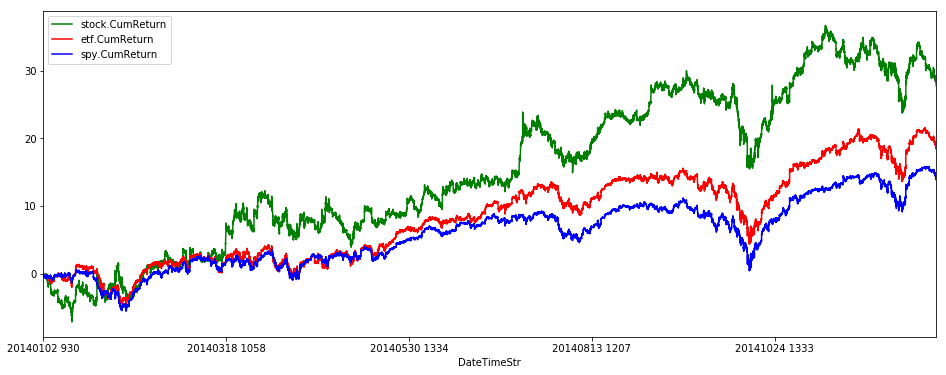

In [218]:
# plot cum returns of stock vs etf vs index
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
stock_combine_data.plot(x='DateTimeStr', y='stock.CumReturn', color='green', ax=plt.gca())
stock_combine_data.plot(x='DateTimeStr', y='etf.CumReturn', color='red', ax=plt.gca())
stock_combine_data.plot(x='DateTimeStr', y='spy.CumReturn', color='blue', ax=plt.gca())
plt.show()

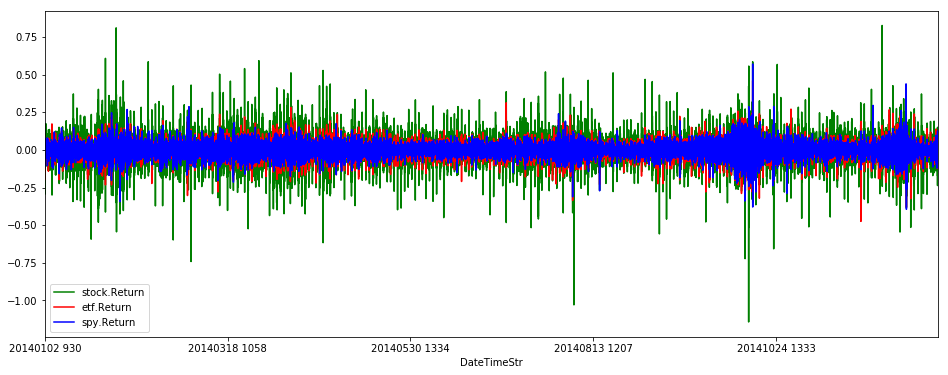

In [219]:
# plot returns for each period (one-min) of stock vs etf vs index
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
stock_combine_data.plot(x='DateTimeStr', y='stock.Return', color='green', ax=plt.gca())
stock_combine_data.plot(x='DateTimeStr', y='etf.Return', color='red', ax=plt.gca())
stock_combine_data.plot(x='DateTimeStr', y='spy.Return', color='blue', ax=plt.gca())
plt.show()

#### OBSERVATION: We can see the volatility of MSFT stock compared to its sector etf (XLK) and the S&P index (SPY). As expected, volatility of MSFT is higher compared to the sector etf, which in turn is relatively higher compared to SPY. In general, individual stocks tend move larger compared to the indices representing the whole sector or market.

In [224]:
file_name='Processed/msft_stock.2014.csv'
stock_combine_data.to_csv(file_name, index=False)

In [612]:
#
# Data wrangling: 
# 1. Note that this is one-min stock data during trading hours (09:30 to 04:00 EST) only. Plotting such data will show 
# discontinuity in the plot for the non-trading hours. We would rather want to show stock prices as one contiguous plot
# to identify pattern. For this reason create a string representation of Date/Time just for plotting purpose.
# 2. Convert Date and Time columns into pandas DateTime type
# 3. create index on date column for faster lookups
#

# convert text date values to concrete type
print("--------------------------------------------------------")
# convert market data volume to int 
stockdata['Volume'] = stockdata['Volume'].map(int)
# convert Date/Time columns into native datetime type
stockdata['DateTimeStr'] = stockdata['Date'].map(str)+' '+stockdata['Time'].map(str)
stockdata['DateTime'] = pd.to_datetime(stockdata['DateTimeStr'], format="%Y%m%d %H%M")

# set DateTime as table index column
stockdata=stockdata.set_index(pd.DatetimeIndex(stockdata['DateTime']))
stockdata

--------------------------------------------------------


,Date,Time,Open,High,Low,Close,Volume,SplitFactor,Earnings,Dividends,DateTimeStr,DateTime
DateTime,,,,,,,,,,,,
2014-01-02 08:00:00,20140102,800,33.4127,33.4127,33.4127,33.4127,234,1,0,0.0,20140102 800,2014-01-02 08:00:00
2014-01-02 08:41:00,20140102,841,33.3940,33.3940,33.3940,33.3940,57,1,0,0.0,20140102 841,2014-01-02 08:41:00
2014-01-02 09:13:00,20140102,913,33.3846,33.3846,33.3846,33.3846,149,1,0,0.0,20140102 913,2014-01-02 09:13:00
2014-01-02 09:30:00,20140102,930,33.2818,33.2818,33.1884,33.2164,182545,1,0,0.0,20140102 930,2014-01-02 09:30:00
2014-01-02 09:31:00,20140102,931,33.2164,33.2164,33.1978,33.2024,23803,1,0,0.0,20140102 931,2014-01-02 09:31:00
2014-01-02 09:32:00,20140102,932,33.2071,33.2258,33.2024,33.2071,21283,1,0,0.0,20140102 932,2014-01-02 09:32:00
2014-01-02 09:33:00,20140102,933,33.2164,33.2351,33.2071,33.2118,40543,1,0,0.0,20140102 933,2014-01-02 09:33:00
2014-01-02 09:34:00,20140102,934,33.2118,33.2118,33.1884,33.1891,21332,1,0,0.0,20140102 934,2014-01-02 09:34:00
2014-01-02 09:35:00,20140102,935,33.1978,33.2071,33.1791,33.1884,17642,1,0,0.0,20140102 935,2014-01-02 09:35:00
